# Import the library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import zipfile

# Data Set

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2022-04-05 09:26:08--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  26.8MB/s    in 7.1s    

2022-04-05 09:26:17 (26.8 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2022-04-05 09:26:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/t

In [3]:
local_zip = "/tmp/rps.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/")
zip_ref.close()

local_zip = "/tmp/rps-test-set.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/")
zip_ref.close()


In [4]:
rock_dir = os.path.join("/tmp/rps/rock")
paper_dir = os.path.join("/tmp/rps/paper")
scissors_dir = os.path.join("/tmp/rps/scissors")

In [5]:
rock_files = os.listdir(rock_dir)
paper_files =os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

In [6]:
rock_files[:10]

['rock07-k03-060.png',
 'rock07-k03-013.png',
 'rock02-070.png',
 'rock07-k03-071.png',
 'rock03-060.png',
 'rock07-k03-003.png',
 'rock07-k03-041.png',
 'rock02-109.png',
 'rock04-095.png',
 'rock03-037.png']

# View data

0
/tmp/rps/rock/rock07-k03-060.png


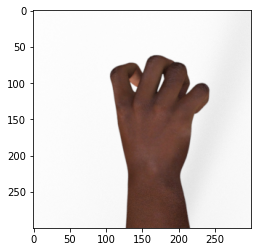

1
/tmp/rps/rock/rock07-k03-013.png


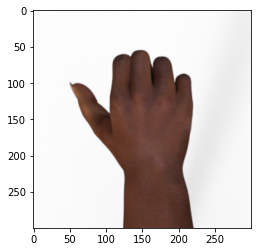

2
/tmp/rps/paper/paper06-105.png


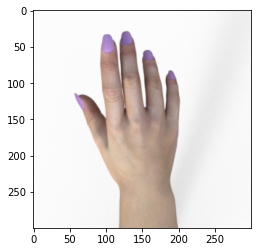

3
/tmp/rps/paper/paper05-044.png


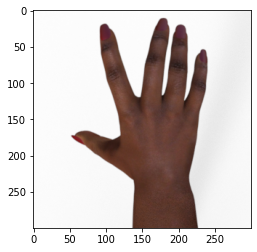

4
/tmp/rps/scissors/testscissors02-027.png


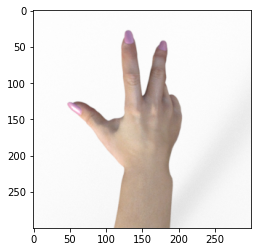

5
/tmp/rps/scissors/scissors04-102.png


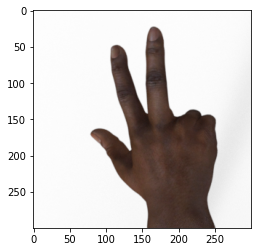

In [7]:
import matplotlib.image as image
pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-2:pic_index]]

next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2:pic_index]]

next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]

for f, im in enumerate(next_rock+next_paper+next_scissors):
  print(f)
  print(im)
  img = image.imread(im)
  plt.imshow(img)
  plt.show()

# Data Augmentation

In [8]:
from keras.preprocessing.image import ImageDataGenerator
training_dir = "/tmp/rps/"
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip= True,
                                      fill_mode="nearest")
validation_dir = "/tmp/rps-test-set/"
validation_datgen= ImageDataGenerator(rescale=1./255)

training_set = training_datagen.flow_from_directory(training_dir,
                                                   class_mode="categorical",
                                                   target_size=(150,150),
                                                   batch_size=20)

validation_set = validation_datgen.flow_from_directory(validation_dir,
                                                       class_mode = "categorical",
                                                       target_size=(150,150),
                                                       batch_size = 20)

print(training_set.class_indices)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
{'paper': 0, 'rock': 1, 'scissors': 2}


# Model Building

In [9]:
from keras import models,layers

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 dropout (Dropout)           (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                    

In [11]:
model.compile(optimizer="adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [14]:
history = model.fit(training_set, epochs=30, steps_per_epoch=25, verbose=1, validation_data= validation_set, validation_steps=5)

Epoch 1/30
25/25 [==============================] - 6s 243ms/step - loss: 0.3785 - accuracy: 0.8660 - val_loss: 0.3481 - val_accuracy: 0.8300
Epoch 2/30
25/25 [==============================] - 5s 218ms/step - loss: 0.3892 - accuracy: 0.8580 - val_loss: 0.2037 - val_accuracy: 0.9800
Epoch 3/30
25/25 [==============================] - 5s 215ms/step - loss: 0.3590 - accuracy: 0.8440 - val_loss: 0.1793 - val_accuracy: 1.0000
Epoch 4/30
25/25 [==============================] - 5s 212ms/step - loss: 0.4836 - accuracy: 0.7960 - val_loss: 0.4489 - val_accuracy: 0.7600
Epoch 5/30
25/25 [==============================] - 6s 234ms/step - loss: 0.5025 - accuracy: 0.7920 - val_loss: 0.5294 - val_accuracy: 0.6900
Epoch 6/30
25/25 [==============================] - 5s 218ms/step - loss: 0.4618 - accuracy: 0.8480 - val_loss: 0.3709 - val_accuracy: 0.8900
Epoch 7/30
25/25 [==============================] - 5s 213ms/step - loss: 0.4123 - accuracy: 0.8500 - val_loss: 0.4004 - val_accuracy: 0.8000
Epoch 

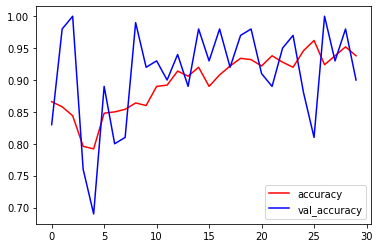

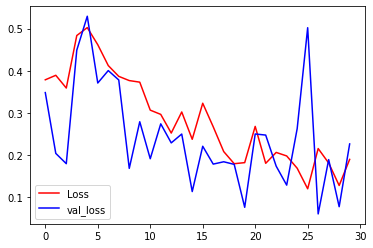

In [15]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epoch = range(len(acc))
plt.plot(epoch, acc, "r", label="accuracy")
plt.plot(epoch, val_acc, "b", label="val_accuracy")
plt.legend(loc=0)
plt.show()

epoch = range(len(loss))
plt.plot(epoch, loss, "r", label = "Loss")
plt.plot(epoch, val_loss, "b", label = "val_loss")
plt.legend(loc=0)
plt.show()

In [26]:
from tensorflow.python.ops.gen_array_ops import expand_dims
from google.colab import files
from keras.preprocessing.image import image, img_to_array

uploaded = files.upload()

for im in uploaded.keys():
  path = im
  img = image.load_img(path, target_size=(150,150))
  img = img_to_array(img)
  img = expand_dims(img, axis=0)
  img = np.vstack([img])
  case = model.predict(img)
  case = np.argmax(case)

Saving testscissors01-01.png to testscissors01-01 (1).png


In [28]:
if case==0:
  print("This is the rock")
elif case==1:
  print("this is paper")
elif case==2:
  print(" This is Scissor")

 This is Scissor
